# Python para Economistas

### Visualização de dados

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ------------------------------------- 950.4/950.4 kB 30.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 2.6 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt # criação de gráficos
import seaborn as sns  # dataviz
import numpy as np
plt.rcParams['figure.dpi'] = 100

Para a parte de visualização de dados utilizaremos a biblioteca Seaborn, que é uma extensão da biblioteca matplotlib. Sua principal vantagem em relação ao matplotlib padrão é ter gráficos estéticamente mais interessantes sem muito esforço. Nesta seção mostraremos alguns tipos de gráficos que podem ser feitos com essa ferramenta. A lista aqui não é exaustiva e busca apenas apresentar a sintaxe padrão. Outros tipos de gráficos possíveis com esta biblioteca estão expostos no site do Seaborn: https://seaborn.pydata.org/#. 

Cada gráfico terá parâmetros específicos. Entretanto, a maior parte utiliza, primordialmente, os parâmetros "x" e "y", que determinam qual variável estará em cada eixo.

## Gráfico de linha

Primeiramente, vamos utilizar o dataset "flights", que contém dados de passageiros de avião para cada mês entre 1949 e 1960. Os dados vem em um formato longo e pela sua formatação, poderíamos criar um gráfico com apenas uma linha pelo tempo.

In [13]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [15]:
flights["time"] = flights["year"].astype(str) + "-" + flights["month"].astype(str)
flights.index = pd.to_datetime(flights["time"], format = "%Y-%b")
flights

,year,month,passengers,time
time,,,,
1949-01-01,1949,Jan,112,1949-Jan
1949-02-01,1949,Feb,118,1949-Feb
1949-03-01,1949,Mar,132,1949-Mar
1949-04-01,1949,Apr,129,1949-Apr
1949-05-01,1949,May,121,1949-May
...,...,...,...,...
1960-08-01,1960,Aug,606,1960-Aug
1960-09-01,1960,Sep,508,1960-Sep
1960-10-01,1960,Oct,461,1960-Oct


<AxesSubplot:xlabel='time', ylabel='passengers'>

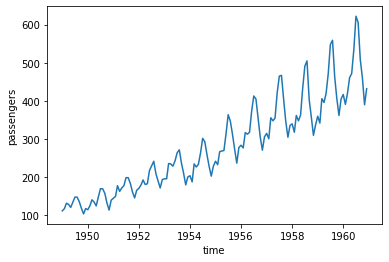

In [16]:
sns.lineplot(data=flights["passengers"])

Agora, se nosso interesse for comparar o comportamento de cada mês ao longo dos anos,
precisamos fazer uma transformação no dataframe. A função "pivot" transforma a tabela de
"longa" para "larga". O primeiro valor indica a coluna que irá virar o índice do dataframe. A
segunda indica qual será transformada nas colunas. Já a terceira, os valores.

In [17]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year'>

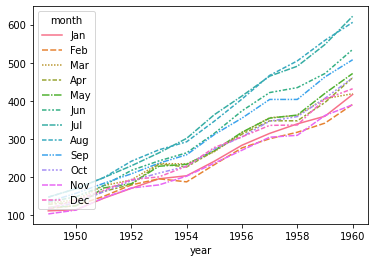

In [18]:
sns.lineplot(data=flights_wide)

## Heatmap

Esse gráfico é interessante quando temos dados sazonais, como é o caso do dataset flights.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1949'),
  Text(0, 1.5, '1950'),
  Text(0, 2.5, '1951'),
  Text(0, 3.5, '1952'),
  Text(0, 4.5, '1953'),
  Text(0, 5.5, '1954'),
  Text(0, 6.5, '1955'),
  Text(0, 7.5, '1956'),
  Text(0, 8.5, '1957'),
  Text(0, 9.5, '1958'),
  Text(0, 10.5, '1959'),
  Text(0, 11.5, '1960')])

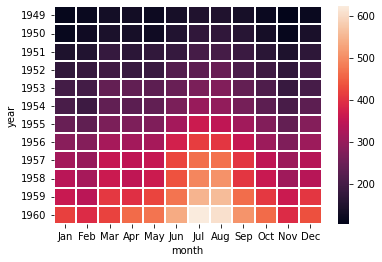

In [24]:
sns.heatmap(flights_wide, fmt="d", linewidths=.1)
plt.yticks(rotation=0) # rotação do label do eixo Y

# Gráfico de dispersão

Agora iremos utilizar a mesma base de dados da seção passada, que apresenta características de
imóveis vendidos na cidade de Ponta Grossa (PR).

In [26]:
#lendo o arquivo em csv
imoveis = pd.read_csv("casas_ponta_grossa.csv")
imoveis.head()

imoveis["Valor Venda"] = imoveis["Valor Venda"]/1000
imoveis 

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3.0,2.0,0.0,2.0,Uvaranas,164.0,430.0
1,148460-4,3.0,2.0,1.0,3.0,Jardim Carvalho,NaN,350.0
2,154166-4,3.0,1.0,1.0,1.0,Oficinas,NaN,300.0
3,146507-4,3.0,2.0,1.0,2.0,Uvaranas,80.0,169.9
4,154050-4,2.0,1.0,0.0,1.0,Uvaranas,NaN,165.0
...,...,...,...,...,...,...,...,...
3571,131553-4,3.0,3.0,1.0,2.0,Nova Rússia,NaN,700.0
3572,106906-4,3.0,5.0,2.0,2.0,Uvaranas,314.0,700.0
3573,130057-4,3.0,3.0,0.0,NaN,Estrela,200.0,700.0
3574,81553-4,4.0,3.0,1.0,2.0,Nova Rússia,400.0,700.0


O gráfico de dispersão é a escolha óbvia quando estamos interessados em analisar a relação entre duas variáveis.

<AxesSubplot:xlabel='Área Total', ylabel='Valor Venda'>

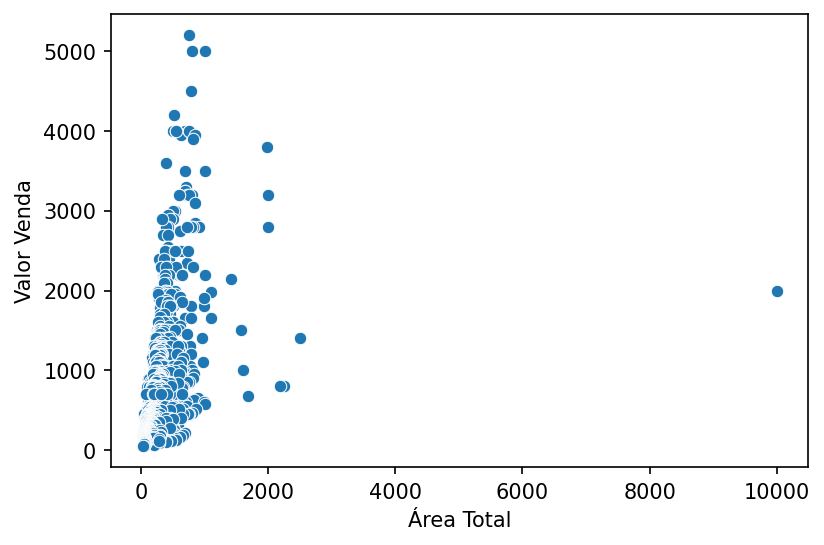

In [32]:
sns.scatterplot(data=imoveis,
x="Área Total",
y="Valor Venda")

## Boxplot

A distribuição de uma variável pode ser visualizada por boxplot. Para isso, utilizamos a função de mesmo nome do seaborn. A dimensão da caixa tem como valor mínimo o primeiro quartil e como máximo o terceiro. A linha de fora da caixa do boxplot depende do valor do chamado IQR (interquartile range), que nada mais é do que a distância entre o valor do terceiro e do primeiro quartil. A linha de fora da caixa vai do primeiro quartil menos 1.5 vezes o valor do IQR e vai até o terceiro quartil mais 1.5 vezes o IQR. A linha no interior da caixa mostra a mediana. Já os pontos estão fora destes valores e são os chamados outliers.

Text(0.5, 0, 'Valor de venda (em milhares de reais)')

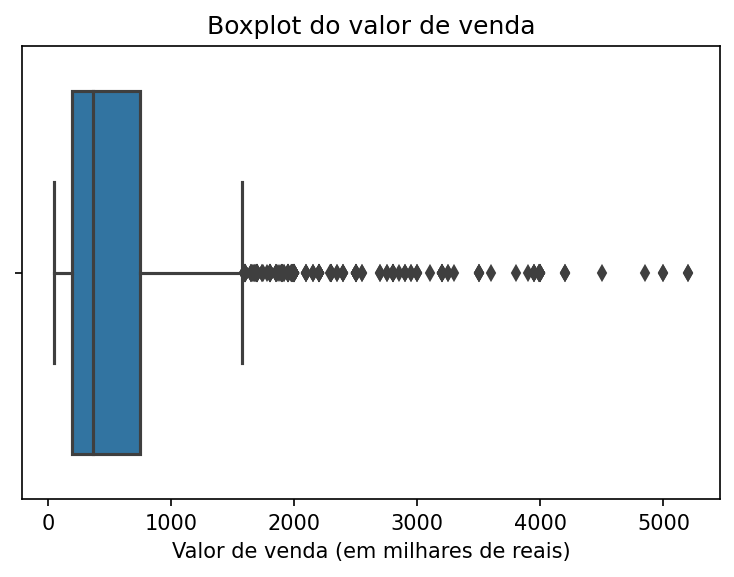

In [42]:
sns.boxplot(x=imoveis["Valor Venda"])
plt.title('Boxplot do valor de venda')
plt.xlabel('Valor de venda (em milhares de reais)')

Com o uso do parâmetro "hue" podemos separar os gráficos em grupos. Para mostrar essa funcionalidade, iremos criar uma variável binária para indicar aqueles imóveis com área maior do que 200 metros quadrados.

<AxesSubplot:xlabel='maisdoque200m2', ylabel='Valor Venda'>

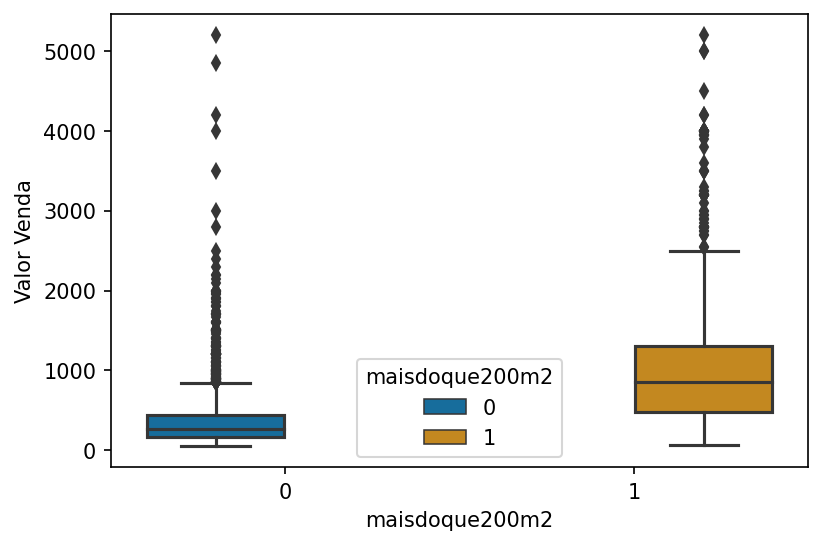

In [43]:
imoveis["maisdoque200m2"] = np.where(imoveis["Área Total"] > 200, 1, 0)

sns.boxplot(data=imoveis,
y='Valor Venda',
x='maisdoque200m2',
palette="colorblind",
hue='maisdoque200m2')

## Histograma

Uma forma mais direta de analisar a distribuição é com o uso de histogramas, que mostram o número de observações para cada valor de variável.

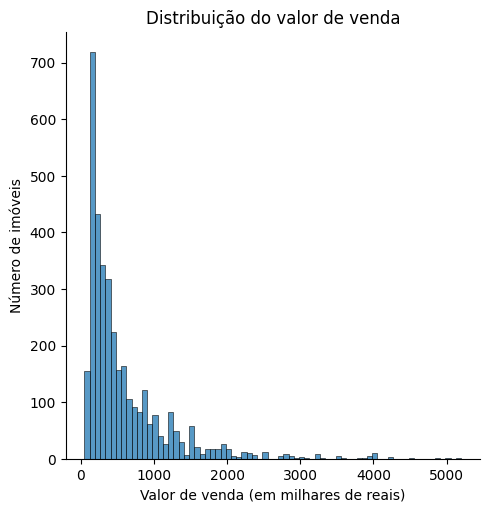

In [48]:
sns.displot(imoveis["Valor Venda"])
plt.title('Distribuição do valor de venda')
plt.ylabel('Número de imóveis')
plt.xlabel('Valor de venda (em milhares de reais)')
plt.show();

## Gráfico de barra

Os gráficos de barra podem ser feitos de duas formas. A primeira com "countplot" quando temos uma variável categórica e queremos mostrar quantas observações há em cada grupo. Na segunda, quando buscamos a relação entre duas variáveis, utilizamos a função "barplot". Essa opção trata a variável "x" como grupo e retorna uma média e o desvio padrão com uma linha.


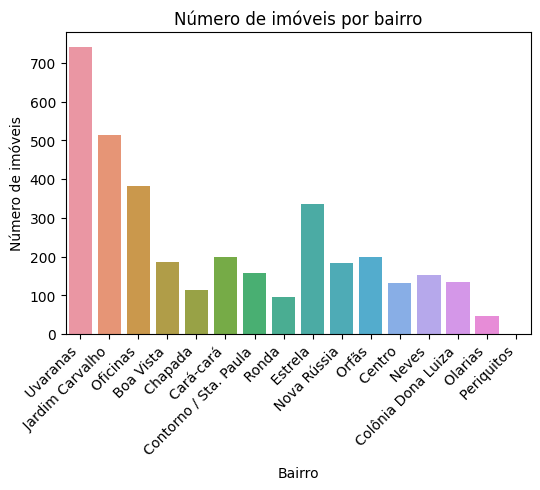

In [49]:
sns.countplot(x='Bairro', data=imoveis)
plt.title('Número de imóveis por bairro')
plt.ylabel('Número de imóveis')
plt.xlabel('Bairro')
plt.xticks(rotation = 45, ha="right")
plt.show();

<AxesSubplot:xlabel='Quartos', ylabel='Valor Venda'>

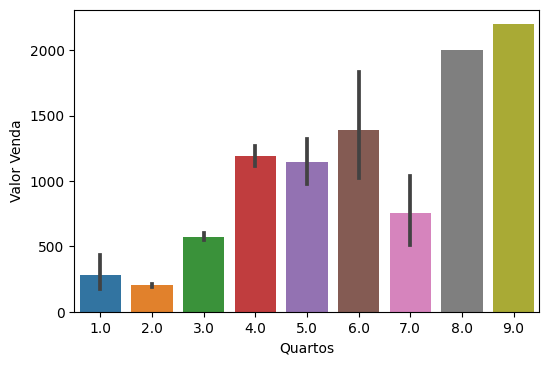

In [50]:
sns.barplot(x = "Quartos", y = "Valor Venda",data = imoveis)

## Gráfico de densidade

Gráficos de densidade são semelhantes aos histogramas que vimos na seção anterior, mas diferem por facilitar a visualização de dois ou mais conjuntos de dados. Dentre as opções para comparação entre grupos, talvez seja uma das mais completas, pois permite observar o comportamento das variáveis totalmente. Ou seja, temos a medida de densidade para cada valor possível.

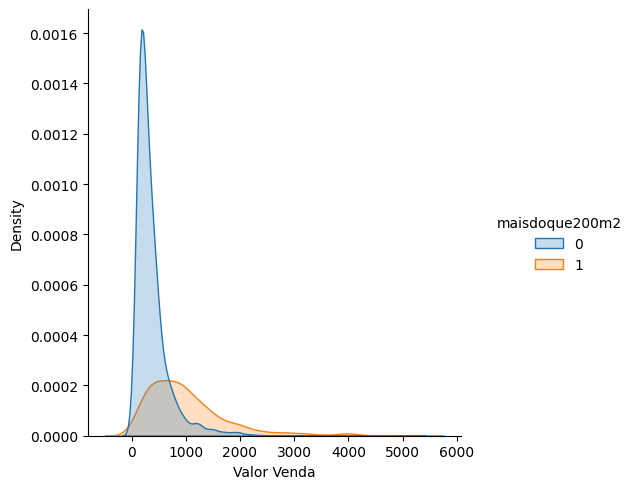

In [51]:
sns.displot(data = imoveis,
x="Valor Venda",
hue="maisdoque200m2",
kind="kde",
fill=True)

## Pairplot

Agora iremos utilizar o clássico dataset "iris", que contém quatro características (comprimento e
largura das sépalas e pétalas) de 50 amostras de três espécies de Iris (Iris setosa, Iris virginica e
Iris versicolor).

O pairplot é uma forma bastante eficiente de comparação de grupos nas diversas variáveis da
base de dados. Ele apresenta uma comparação dos histogramas de cada uma das colunas por
grupos, além de um gráfico de dispersão entre as colunas, também separados por estes
mesmos grupos. Porém, a inclusão de muitos grupos/variáveis podem dificultar a visualização.

In [52]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


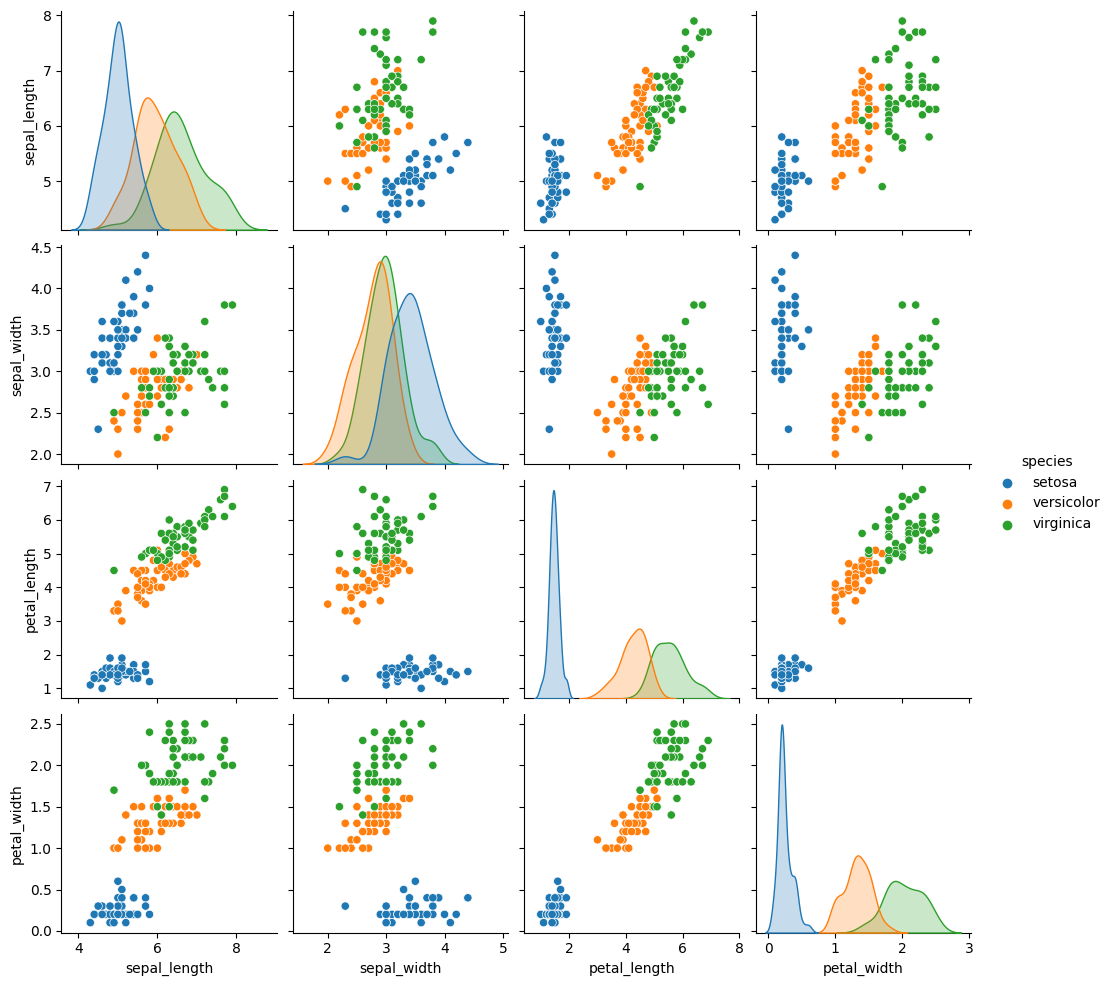

In [53]:
sns.pairplot(iris, hue='species')